# CRISP DM

## Bussines Understanding

Problem dataset (https://www.kaggle.com/datasets/reihanenamdari/breast-cancer) yang Saya gunakan dari kaggle mengenai Breast Cancer ini untuk mengevaluasi dan juga memprediksi apakah pasien memiliki penyakit hati atau tidak berdasarkan fitur tertentu seperti umur, race, status hubungan pasien, ukuran tumor dan lainnya dengan menggunakan metode algoritma Decission Tree. Breast Kanker (Kanker Payudara) adalah jenis kanker yang berkembang di jaringan payudara. Ini adalah salah satu jenis kanker yang paling umum pada wanita, dan juga dapat terjadi pada pria, meskipun jauh lebih jarang. Dataset Breast Cancer ini berisi 4024 pengamatan dengan 16 kolom fitur dan mayoritas pasien yang didiagnosis menderita kanker ini berstatus sudah menikah, serta hampir 98% dari penyebaran breast cancer terjadi di perkotaan dan hanya 2% terjadi di pedesaan. Di karenakan faktor keturunan, lingkungan, pola hidup yang tidak sehat, hormon estrogen dan progesteron berlebih dalam tubuh, obesitas, merokok dan lain-lain. Oleh karena itu, tujuan utama dari analisis data ini adalah untuk mengidentifikasi hubungan antara fitur dan memprediksi status pasien yang di diagnosis penyakit breast cancer. Tak hanya itu, di gunakannya data ini yaitu bagaimana memprediksi hidup atau meninggalnya pasien penyakit breast cancer dengan tingkat akurasi yang telah di dapatkan dan mencari atribut/label paling berpengaruh terhadap prediksi data breast cancer ini. Agar perkembangan penyakit dapat dihindari, ditemukan lebih awal, ketika masih kecil dan belum menyebar, lebih mudah diobati, sehingga prognosis menjadi lebih baik dan dapat mencegah kematian.

## Data Understanding

Berikut atribut-atribut dari data breast cancer :

0. Age : umur pasien breast cancer.
1. Race : Ras setiap pasien breast cancer (2 = berkulit putih, 1 = Other, 0 = berkulit hitam). Sebagian besar pasien termasuk dalam kategori ras berkulit putih sedangkan beberapa pasien diidentifikasi sebagai ras berkulit hitam atau lainnya.
2. Marital_Status : Hubungan pasien dengan pasangannya diklasifikasikan sebagai Menikah, Lajang, Bercerai, Janda, dan Berpisah. Mayoritas pasien yang didiagnosis menderita kanker sudah menikah.
3. T_Stage : Tahap T menggambarkan ukuran tumor. Ada empat kategori di bawah fitur T Stage. 44,4% pasien didiagnosis dengan kategori T2, yang sesuai dengan ukuran tumor antara 20mm dan 50mm. Ini diikuti oleh T1, T3, dan T4 dengan pangsa masing-masing 39,8%, 13,3%, dan 2,5%. 
4. N_Stage : Tahap N mewakili sejauh mana kanker menyebar ke kelenjar getah bening. Ini memiliki tiga kategori: N1, N2, dan N3. Sekitar 68% pasien berada di Tahap N1 yang berarti kanker telah menyebar ke 1 hingga 3 kelenjar getah bening aksila (ketiak), dan kanker ditemukan di kelenjar getah bening susu internal.
5. 6th_Stage: Kolom Tahap 6 berkaitan dengan pengelompokan tahap untuk kanker payudara. Kelompok tahap ini didasarkan pada kombinasi Tahap T, Tahap N, dan Tahap M (Metastasis - yang tidak tersedia dalam dataset). Lima kategori kolom Tahap ke-6 dan proporsinya dalam dataset adalah IIA (32,4%), IIB (28,1%), IIIA (26,1%), IIIC (11,7%), dan IIIB (1,7).
6. differentiation : Perbedaan sel, proses ketika sel kurang khusus menjadi sel yang lebih khusus.
7. Grade : Seberapa baik tumor menyerupai jaringan normal.

        - Grade I - Terdiferensiasi dengan baik (ditemukan pada 13,5% pasien)
        - Grade II - Berdiferensiasi sedang (58,4%)
        - Grade III - Berdiferensiasi buruk (27,6%)
        - Grade IV - Tidak berdiferensiasi (anaplastik) (0,5%)

8. A_Stage : - Regional (1), - Distant (0)
9. Tumor_size : Ukuran tumor pasien (mm). Ukuran rata-rata adalah 30,47 sedangkan ukuran minimum dan maksimum tumor masing-masing adalah 1 dan 140 mm.
10. Estrogen_Status : Status hormon perempuan yang di produksi oleh ovarium. (Positive = 1, Negarive = 0).
11. Progesteron_Stage : Status hormon pasien dari golongan steroid yang berpengaruh pada siklus mentruasi perempuan, kehamilan dan embriogenesis. Saat hormon ini meningkat tinggi, biasanya tubuh tidak akan berovulasi. (Positive = 1, Negarive = 0).
12. Regional_Node_Examined : Simpul regional yang diperiksa mencatat jumlah pasti simpul regional yang diangkat dan dperiksa oleh ahli patologi. 
13. Regional_Node_Positive : TNodus regional positif mencatat jumlah pasti kelenjar getah bening regional yang diperiksa oleh ahli patologi. 
14. Survival_Months : Untuk kolom numerik Bulan Kelangsungan Hidup, nilai rata-ratanya adalah 71,3 bulan. Kisaran kolom ini adalah antara 1 dan 107.
15. Status : Label output dari data, apakah pasien tersebut hidup atau mati. 

        - 0 = Alive
        - 1 = Dead

# Import library

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Breast_Cancer.csv")

In [4]:
df.head()

,Age,Race,Marital_Status,T_Stage,N_Stage,The_6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital_Status          4024 non-null   object
 3   T_Stage                 4024 non-null   object
 4   N_Stage                 4024 non-null   object
 5   The_6th_Stage           4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A_Stage                 4024 non-null   object
 9   Tumor_Size              4024 non-null   int64 
 10  Estrogen_Status         4024 non-null   object
 11  Progesterone_Status     4024 non-null   object
 12  Regional_Node_Examined  4024 non-null   int64 
 13  Reginol_Node_Positive   4024 non-null   int64 
 14  Survival_Months         4024 non-null   int64 
 15  Stat

# DATA PREPARATION

In [6]:
independen = [col for col in df.columns != 'Status']
defenden = 'Status'

# Transformasi Data

In [7]:
# memisahkan numerik dan kategori
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == 'float64':
        numerical.append(col)
    elif df[col].dtype == 'int64':
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
numerical

['Age',
 'Tumor_Size',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months']

In [9]:
catgcols

['Race',
 'Marital_Status',
 'T_Stage ',
 'N_Stage',
 'The_6th_Stage',
 'differentiate',
 'Grade',
 'A_Stage',
 'Estrogen_Status',
 'Progesterone_Status',
 'Status']

In [10]:
df['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

In [11]:
df['Race'].value_counts()

White    3413
Other     320
Black     291
Name: Race, dtype: int64

In [12]:
df['A_Stage'].value_counts()

Regional    3932
Distant       92
Name: A_Stage, dtype: int64

In [13]:
df['Progesterone_Status'].value_counts()

Positive    3326
Negative     698
Name: Progesterone_Status, dtype: int64

In [14]:
df['Estrogen_Status'].value_counts()

Positive    3755
Negative     269
Name: Estrogen_Status, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [16]:
df['Status'] = le.fit_transform(df['Status'])

In [17]:
df.head()

,Age,Race,Marital_Status,T_Stage,N_Stage,The_6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


In [18]:
df.to_csv('Kankerpd.csv')

In [19]:
df['Status'].value_counts()

0    3408
1     616
Name: Status, dtype: int64

In [33]:
df['Race'].value_counts()

2    3413
1     320
0     291
Name: Race, dtype: int64

# Split data

In [20]:
X = df.drop(columns=['Status','Regional_Node_Examined', 'Reginol_Node_Positive'], axis=1)
Y = df['Status']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, x_train.shape, x_test.shape)

(4024, 13) (3219, 13) (805, 13)


# MODELLING DATA

# Membuat model training

In [23]:
desicion = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

In [24]:
model = desicion.fit(x_train, y_train)

# EVALUATION 

# Evaluasi model

In [25]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [26]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.911152531842187


In [27]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [28]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.8956521739130435


# Visualisasi Data

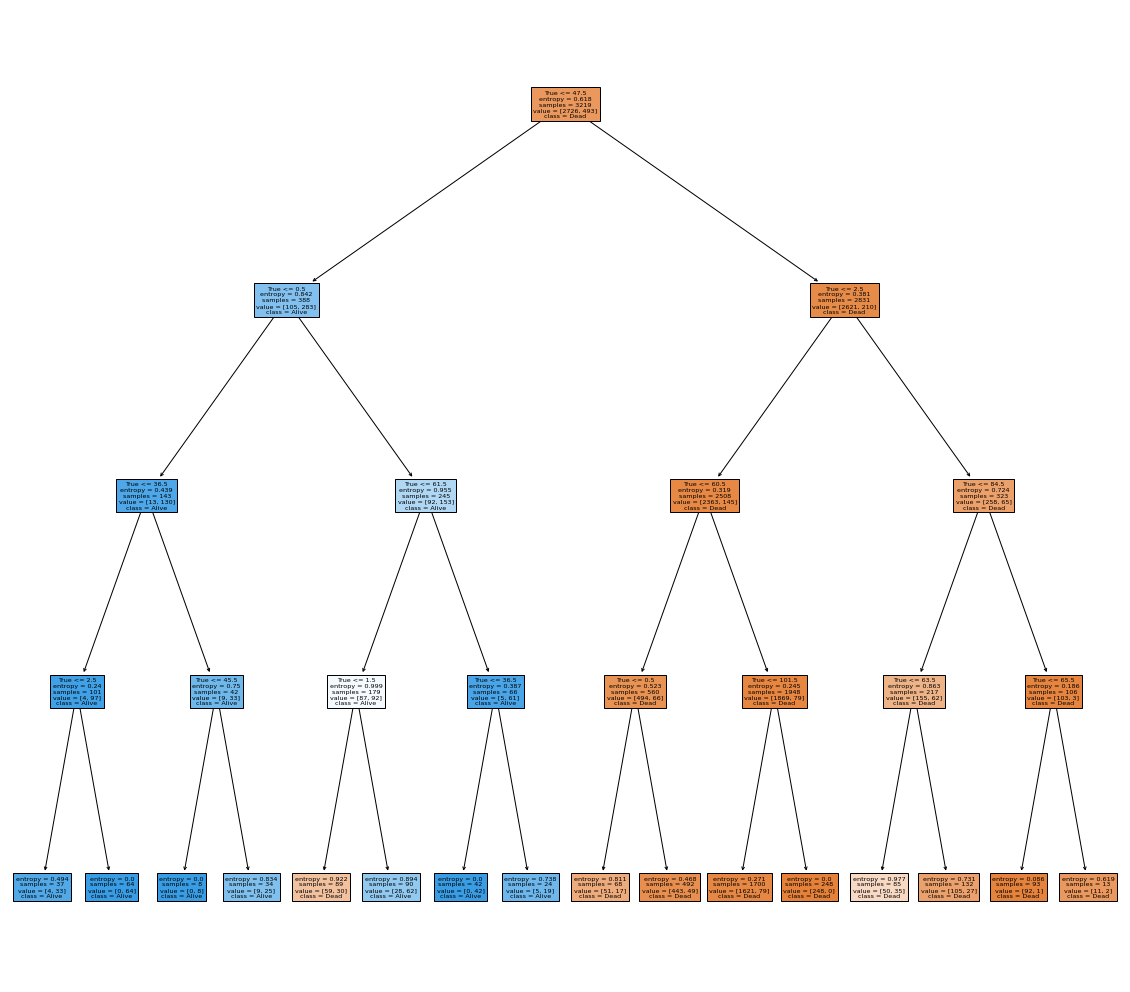

In [29]:
fig = plt.figure(figsize=(20, 18))
_ = tree.plot_tree(
    model,
    feature_names = independen,
    class_names = ['Dead', 'Alive'],
    filled = True)

# Model Prediksi

In [31]:
input_data = (58, 2, 0, 2, 2, 4, 0, 2, 1, 63, 1, 1, 75)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Pasien tidak meninggal dunia')
else:
    print('Pasien meninggal dunia')

[0]
Pasien tidak meninggal dunia


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

# Save Model

In [32]:
import pickle

filename = 'BreastCancer.sav'
pickle.dump(model, open(filename, 'wb'))